## Load the Training & Validation Sets:

In [1]:
#Load Training and Validation sets:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate
import csv
import sys
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import gc

trainBench = pd.read_csv("c:/Benchmarking/trainBench.csv")
#testBench = pd.read_csv("c:/Benchmarking/testBench.csv")
validBench = pd.read_csv("c:/Benchmarking/validBench.csv")

SplitPoint=len(trainBench.index) #SplitPoint = trainBench.shape[0] #trainBench.count(axis=0)
print("SplitPoint: ",SplitPoint)

df = pd.concat([trainBench,validBench],axis=0)
del trainBench, validBench
gc.collect()

df = df.drop("ID", axis=1)
Int64columns = df.select_dtypes(['int64']).columns
#Int64columns
df[Int64columns] = df[Int64columns].astype(np.int32)
#numerical enconde Assortment type & Store Type
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].astype('category')
#print("Categorical Columns:")
#print(df.select_dtypes(['category']).columns)
#print(" ")
#print(" ")
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

trainBench, validBench = df.iloc[:SplitPoint, :], df.iloc[SplitPoint:, :]
print("Training Set shape",trainBench.shape)
print("Validation Set shape",validBench.shape)
del df
gc.collect()

print(" ")
print(" ")
print("Train Data Type Descriptions:")
TrainDataTypes=trainBench.dtypes
#print(TrainDataTypes)
print(trainBench.info())
print(" ")
print(" ")
#print(validBench.info())

# Split Features and Responses
mask = trainBench.columns.difference(['NumberOfSales'])
trainDataset_X = trainBench[mask]
#print(" ")
#print(" ")
print("Feature Columns:")
print(mask)
trainDataset_y = trainBench['NumberOfSales']
#print("Head of Validation Data:")
#print(validBench.head(3))
#print(" ")
#print(mask)
validBench_X = validBench[mask]
validBench_y = validBench['NumberOfSales']
#CatCols=[trainBench.columns.get_loc(c) for c in trainBench.select_dtypes(['category']).columns if c in trainBench]
del trainBench, validBench
gc
import platform
import sys
OpSys=platform.system()[:3]
print(OpSys)
OpSysVer=platform.release()
print(OpSysVer)
LangVer=sys.version[:5]
print(LangVer)
import sklearn
Lib='sklearn'
print(Lib)
LibVer= sklearn.__version__
print(LibVer)

from openpyxl import load_workbook
workbook_name = 'C:\\Benchmarking\\AlgoPerf.xlsx'
def xlsADD(row):
    wb = load_workbook(workbook_name)
    page = wb.active
    page.append(row)
    wb.save(filename=workbook_name) 

def InsertHeader():
    Result=('OpSys','OpVer', 
            'Lang', 
            'LangVer', 
            'Lib', 
            'Lib.Ver', 
            'Algo',
            'M_FitTime', 
            'XVR_FitTime',
            'XVR_ScorTime',
            'XV_Time',
            'XV_EV',
            'XV_MAE', 
            'XV_MSE', 
            'XV_RMSE', 
            'XV_R2',
            'TS_PredTime',
            'TS_EV',
            'TS_MAE', 
            'TS_MSE', 
            'TS_RMSE', 
            'TS_R2',
            'MeanEV',
            'MdlParam', 
            'FeatImp',
            'TdTypes',
            'Comments')
    #print(Result)
    xlsADD(Result)
    
def InsertValues():
    Result=(OpSys, 
            OpSysVer, 
            'Python', 
            LangVer, 
            Lib, 
            LibVer,
            Algo,
            M_FitTime, 
            XVR_FT,
            ST,
            XValidTime,
            EV,
            MAE, 
            MSE, 
            RMSE, 
            R2,
            PredTime,
            EVv,
            MAEv, 
            MSEv, 
            RMSEv, 
            R2v,
            EVtot.mean(),
            str(Params), 
            str(d),
            str(TrainDataTypes),
            Comments)
    #print(Result)
    xlsADD(Result)


SplitPoint:  100553
Training Set shape (100553, 18)
Validation Set shape (20405, 18)
 
 
Train Data Type Descriptions:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100553 entries, 0 to 100552
Data columns (total 18 columns):
StoreID                 100553 non-null int32
IsHoliday               100553 non-null int32
IsOpen                  100553 non-null int32
HasPromotions           100553 non-null int32
StoreType               100553 non-null int8
AssortmentType          100553 non-null int8
NearestCompetitor       100553 non-null int32
Region                  100553 non-null int32
NumberOfSales           100553 non-null int32
Region_AreaKM2          100553 non-null int32
Region_GDP              100553 non-null int32
Region_PopulationK      100553 non-null int32
Year                    100553 non-null int32
Month (number)          100553 non-null int32
Week                    100553 non-null int32
Day of year             100553 non-null int32
Day of month            100553 non-n

## Cross Validate and Score

In [222]:
#Cross Validate and Score
params={}
def CrossEval(SplitPercent=20,MdlParams={}, verbose=False):
    #**************Insert comments about this run here:
    global Comments
    #Comments='n_estimators=250, max_features=n_features-15, max_depth = 15, '+ str(SplitPercent)+'% of the training data'
    global Algo
    Algo='ExtraTreesRegressor'
    Nrows,Ncols=trainDataset_X.shape
    SplitPoint=int(Nrows*(SplitPercent/100))
    X, y = trainDataset_X.iloc[:SplitPoint, :], trainDataset_y.iloc[:SplitPoint]
    #if verbose: 
    print("Training data set shape:",X.shape)
    start=time.time()
    forest = ExtraTreesRegressor(n_estimators=240, 
                                 max_features = int(X.columns.size - 15),
                                 max_depth = 16,
                                 n_jobs=-1, 
                                 random_state=0)
    if MdlParams != {}:
        forest.set_params(**MdlParams)
    
    forest.fit(X, y)
    global M_FitTime, XValidTime, PredTime
    M_FitTime = time.time() - start
    if verbose:print("Measured Fit Time: ", M_FitTime)

    UseTScv=True
    if UseTScv:
        from sklearn.model_selection import TimeSeriesSplit
        if verbose:print("Using Time Series Cross Validation")
        start=time.time()
        tscv = TimeSeriesSplit(n_splits=5)
        scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=tscv, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )        
    else:
        from sklearn.model_selection import KFold
        if verbose:print("Using KFold Cross Validation")
        start=time.time()
        kfolds = KFold(n_splits=5,shuffle=False,random_state=0)
        scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=kfolds, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )

    XValidTime = time.time() - start

    if verbose:print(" ")
    if verbose:print("Model Parameters: ")
    global Params
    Params=forest.get_params(deep=True)
    if verbose:print(Params)
    if verbose:print(" "); 
    global EV, MAE, MSE, RMSE, R2,XVR_FT, ST 
    if verbose:print("Cross Validation Performance: ")
    #if verbose:
    print("Cross Validation Time: %0.6f" % (XValidTime))
    EV=scores['test_explained_variance'].mean()
    if verbose:print(scores['test_explained_variance'])
    if verbose:print("EV: %0.6f" % (EV))
    #MAE is less sensitive to outliers, The contant value that minimizes the MAE is the median of the target values
    if verbose:print(-1*scores['test_neg_mean_absolute_error'])
    MAE=-1*scores['test_neg_mean_absolute_error'].mean()
    if verbose:print("MAE: %0.6f" % (MAE))
    #MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    if verbose:print(-1*scores['test_neg_mean_squared_error'])
    MSE=-1*scores['test_neg_mean_squared_error'].mean()
    if verbose:print("MSE: %0.6f" % (MSE))
    if verbose:print(np.sqrt(-1*scores['test_neg_mean_squared_error']))
    RMSE=np.sqrt(-1*scores['test_neg_mean_squared_error'].mean())
    if verbose:print("RMSE: %0.6f" % (RMSE))
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    if verbose:print("XV R2 Actuals:",scores['test_r2'])
    R2=scores['test_r2'].mean()
    if verbose:print("Cross Validation R2: %0.6f" % (R2))
    if verbose:print("XVR_fit_time Actuals: ", (scores['fit_time']))
    XVR_FT=scores['fit_time'].mean()
    if verbose:print("XVR_fit_time: %0.6f" % (XVR_FT))
    if verbose:print("score_time Actuals: ", (scores['score_time']))      
    ST=scores['score_time'].mean()
    if verbose:print("score_time: %0.6f" % (ST))

    Comments=str(Params)
    
    # Score Validation Set: 
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import r2_score

    start=time.time()
    y_pred=forest.predict(validBench_X)
    PredTime = time.time() - start

    if verbose:print(" ")
    if verbose:print(" ")
    global EVv, MAEv, MSEv, RMSEv, R2v, EVtot
    if verbose:print("Prediction Time: ", PredTime)
    if verbose:print(" ")
    if verbose:print("Validation data set shape:",validBench_X.shape)
    EVv=explained_variance_score(validBench_y, y_pred)
    if verbose:print("Validation Set Explained Variance (EV): %0.2f" % (EVv))
    #MAE is less sensitive to outliers, The constant value that minimizes the MAE is the median of the target values
    MAEv=mean_absolute_error(validBench_y, y_pred)
    if verbose:print("MAE: %0.6f" % (MAEv))
    #MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    MSEv=mean_squared_error(validBench_y, y_pred)
    if verbose:print("MSE: %0.6f" % (MSEv))
    RMSEv=np.sqrt(MSEv)
    if verbose:print("RMSE: %0.6f" % (RMSEv))
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    R2v=r2_score(validBench_y, y_pred)
    if verbose:print("Validation Set R2: %0.6f" % (R2v))
    EVtot=scores['test_explained_variance'].copy()
    EVtot = np.append(EVtot,EVv)
    EVtotMean=EVtot.mean()
    if verbose:print("Total Mean EV: ",EVtot,EVtotMean)
    
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    if verbose:print(" ")
    if verbose:print(" ")
    if verbose:print("Feature Importances:")
    global d
    d=[]
    
    for f in range(X.shape[1]):
        if verbose:print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
        d.append({"%d. feat: %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]])})
    if verbose:print(" ")
    if verbose:print("Validation Set EV, XVal EV, Mean EV: ",EVv, EV, EVtotMean)
    #InsertHeader()
    #InsertValues()
    return EVv, EV, EVtotMean

# Pattern Search:

In [223]:
PercentToUse=100
alfa=2;Episilon=0.001;k=0
Delta=[]
Delta.append(2)

class Dimension():
    def __init__(self, value=[]):
        self.value=value
        self.value.sort()
        self.min=self.value[0]
        self.max=self.value[len(value)-1]
        self.midptidx=int((len(self.value)/2)-0.5)
        self.midpoint=self.value[self.midptidx]
        self.Delta=(len(value)-1)-self.midptidx
        self.BestValue=self.midpoint
        self.CurrIndex=self.midptidx
        self.BestIndex=self.midptidx

Space={'n_estimators':Dimension([230,240,250]),
       'max_features':Dimension([2,3]),
       'max_depth':Dimension([16,17,30])}

print(list(Space.values())[0].Delta,list(Space.values())[1].Delta,list(Space.values())[2].Delta)
print(" ");print(" ")

xc={}
#builds the first exploratory point by collecting the midpoint of each dimension:
for Dkey, Dval in Space.items():
    xc[Dkey]=Dval.midpoint
print(xc)

BestScore,_,_=CrossEval(PercentToUse,xc)
cols=list(xc.keys())
cols.append('score')
df=pd.DataFrame(columns=cols)
xc.update({'score':BestScore})
df=df.append(xc, ignore_index=True)
print(df)

Ndimensions=len(Space);  
BestIdx=0; InitialExploration=0

# i=exploratory moves iterations; k=Overall Iterations
i=0; Continue=0

while Continue<3:
    #Exploratory Search:
    while i < Ndimensions:
        k+=1
        for Direction in [1,-1]:
            xn={}; xd={}
            for CurDim in range(0,Ndimensions): #Build the vextor xn:
                if i == CurDim:
                    NewIndex=list(Space.values())[CurDim].CurrIndex + Direction*list(Space.values())[CurDim].Delta
                    #print(NewIndex)
                    if NewIndex>len(list(Space.values())[CurDim].value)-1: NewIndex=len(list(Space.values())[CurDim].value)-1
                    if NewIndex<0: NewIndex=0
                    xn[list(Space.keys())[CurDim]]=list(Space.values())[CurDim].value[NewIndex]
                else:
                    xn[list(Space.keys())[CurDim]]=list(Space.values())[CurDim].BestValue
            if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
                #print("Vetor",xn," nao esta em df. Executando Random Forest")
                print(Direction, xn)            
                CurrScore,_,_=CrossEval(PercentToUse,xn)
                #cols=list(xn.keys())
                #cols.append('score')
                xd=xn.copy()
                xd.update({'score':CurrScore})
                df=df.append(xd, ignore_index=True)
                print(df)
                #print(CurrScore)
                if CurrScore > BestScore: 
                    BestScore=CurrScore
                    list(Space.values())[i].BestValue=list(Space.values())[i].value[NewIndex]
                    list(Space.values())[i].BestIndex=NewIndex
                    xc=xn.copy()
                    BestIdx=k
                    break
        list(Space.values())[i].CurrIndex=list(Space.values())[i].BestIndex 
        i+=1

    #pattern move:
    pm=df.values[BestIdx]+(df.values[BestIdx]-df.values[InitialExploration])
    pm=pm[0:(len(pm)-1)]
    print(pm)

    #picks the closest elements in the lists to the ideal point
    n=0
    for Dkey, Dval in Space.items():
        xn[Dkey]=min(Dval.value, key=lambda x:abs(x-pm[n])) 
        n+=1

    #Evaluates pattern move it it has not been evaluated already:
    if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
        print(xn)
        print("Executing Pattern Move...")
        k+=1
        CurrScore,_,_=CrossEval(PercentToUse,xn)
        xd=xn.copy()
        xd.update({'score':CurrScore})
        df=df.append(xd, ignore_index=True)
        print(df)
        if CurrScore > BestScore:
            BestScore=CurrScore
            xc=xn.copy()
            for CurDim in range(0,Ndimensions):
                list(Space.values())[CurDim].BestIndex=list(Space.values())[CurDim].value.index(list(xc.values())[CurDim])
                list(Space.values())[CurDim].CurrIndex=list(Space.values())[CurDim].BestIndex
                list(Space.values())[CurDim].BestValue=list(xc.values())[CurDim]
            BestIdx=k
            InitialExploration=BestIdx
            BestScore=CurrScore
        else:
            #divide delta by 2
            DeltaVector=[]
            for CurDim in range(0,Ndimensions):
                list(Space.values())[CurDim].Delta=int(0.5+list(Space.values())[CurDim].Delta/alfa)
                DeltaVector.append(list(Space.values())[CurDim].Delta)
    else:
        #divide delta by 2
        print("Pattern move point",xn," has been evaluated")
        DeltaVector=[]
        for CurDim in range(0,Ndimensions):
            list(Space.values())[CurDim].Delta=int(0.5+list(Space.values())[CurDim].Delta/alfa)
            if list(Space.values())[CurDim].Delta==0: list(Space.values())[CurDim].Delta=1
            DeltaVector.append(list(Space.values())[CurDim].Delta)

    print(DeltaVector)
    i=0 
    if DeltaVector==list(np.ones(3)): Continue+=1

print("Best Parameters Found:")
df.loc[df['score'].idxmax()]


1 1 1
 
 
{'n_estimators': 240, 'max_features': 2, 'max_depth': 17}
Training data set shape: (100553, 17)
Cross Validation Time: 34.411968
   n_estimators  max_features  max_depth     score
0         240.0           2.0       17.0  0.679917
1 {'n_estimators': 250, 'max_features': 2, 'max_depth': 17}
Training data set shape: (100553, 17)
Cross Validation Time: 33.190898
   n_estimators  max_features  max_depth     score
0         240.0           2.0       17.0  0.679917
1         250.0           2.0       17.0  0.679335
-1 {'n_estimators': 230, 'max_features': 2, 'max_depth': 17}
Training data set shape: (100553, 17)
Cross Validation Time: 31.665811
   n_estimators  max_features  max_depth     score
0         240.0           2.0       17.0  0.679917
1         250.0           2.0       17.0  0.679335
2         230.0           2.0       17.0  0.679552
1 {'n_estimators': 240, 'max_features': 3, 'max_depth': 17}
Training data set shape: (100553, 17)
Cross Validation Time: 33.954942
   n_est

n_estimators    240.000000
max_features      2.000000
max_depth        16.000000
score             0.680345
Name: 5, dtype: float64

In [17]:
k=5
pm=df.values[k]+(df.values[k]-df.values[k-i])
pm=pm[0:3]
n=0
for Dkey, Dval in Space.items():
    xc[Dkey]=min(Dval.value, key=lambda x:abs(x-pm[n])) #picks the closes elements in the lists to the ideal point
    n+=1
print(xc)

{'n_estimators': 240, 'max_features': 2, 'max_depth': 18}


# SKopt Baysian Optimization:

In [238]:
PercentToUse=100
def objective(params):
    print(params)
    keys=['n_estimators','max_features','max_depth']
    xc=dict(zip(keys,params))
    Score,_,_=CrossEval(PercentToUse, xc)
    print(Score)
    return -Score

from skopt import gp_minimize

Space=[[230,240,250],  #'n_estimators'
       [2,3], #'max_features'
       [16,17,30]] #'max_depth'

#gp_minimize requires a minimum of 10 function calls
r=gp_minimize(objective, Space, n_calls=10, random_state=0)

[240, 3, 30]
Training data set shape: (100553, 17)
Cross Validation Time: 58.464344
0.6458001773754825
[250, 3, 17]
Training data set shape: (100553, 17)
Cross Validation Time: 37.392139
0.6741501541783825
[230, 2, 16]
Training data set shape: (100553, 17)
Cross Validation Time: 28.869651
0.6800284818335245
[240, 3, 17]
Training data set shape: (100553, 17)
Cross Validation Time: 36.414083
0.6738686885201622
[240, 3, 17]
Training data set shape: (100553, 17)
Cross Validation Time: 38.886224
0.6738686885201622
[240, 2, 30]
Training data set shape: (100553, 17)
Cross Validation Time: 57.103266
0.6544249628704046
[230, 3, 17]
Training data set shape: (100553, 17)
Cross Validation Time: 34.141953
0.6729350987370989
[250, 3, 30]
Training data set shape: (100553, 17)
Cross Validation Time: 60.614467
0.6467656594479332
[250, 3, 17]
Training data set shape: (100553, 17)
Cross Validation Time: 37.409140
0.6741501541783825
[250, 2, 17]
Training data set shape: (100553, 17)
Cross Validation Time:

In [239]:
print(r.x)
r.fun

[230, 2, 16]


-0.6800284818335245

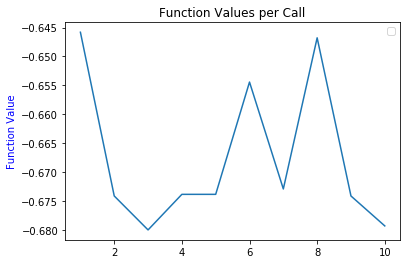

In [251]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title("Function Values per Call")
ax1.set_ylabel('Function Value', color='b')
plt.legend(['Fuction Value'])
plt.plot(range(1,11),r.func_vals)

KeyError: 230.25641025641025

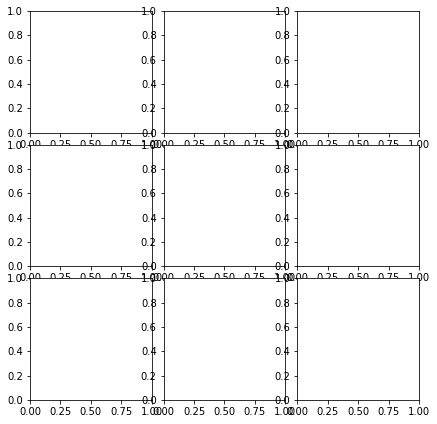

In [241]:
from skopt.plots import plot_objective
plot_objective(r)

# Feature Selector:

 
 
Measured Fit Time:  3.221184015274048
 
 
Model Parameters: 
{'bootstrap': False, 'criterion': 'mse', 'max_depth': 15, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 
 
Feature ranking:
1. feature 6 IsOpen (0.380287)
2. feature 4 HasPromotions (0.155310)
3. feature 2 Day of week (number) (0.104303)
4. feature 13 StoreID (0.045440)
5. feature 11 Region_GDP (0.043561)
6. feature 14 StoreType (0.042415)
7. feature 5 IsHoliday (0.039981)
8. feature 8 NearestCompetitor (0.039229)
9. feature 0 AssortmentType (0.034189)
10. feature 10 Region_AreaKM2 (0.023997)
11. feature 12 Region_PopulationK (0.022469)
12. feature 9 Region (0.019379)
13. feature 3 Day of year (0.013333)
14. feature 1 Day of month (0.012330)
15. feature 15 Week (0.011289)
16. featu

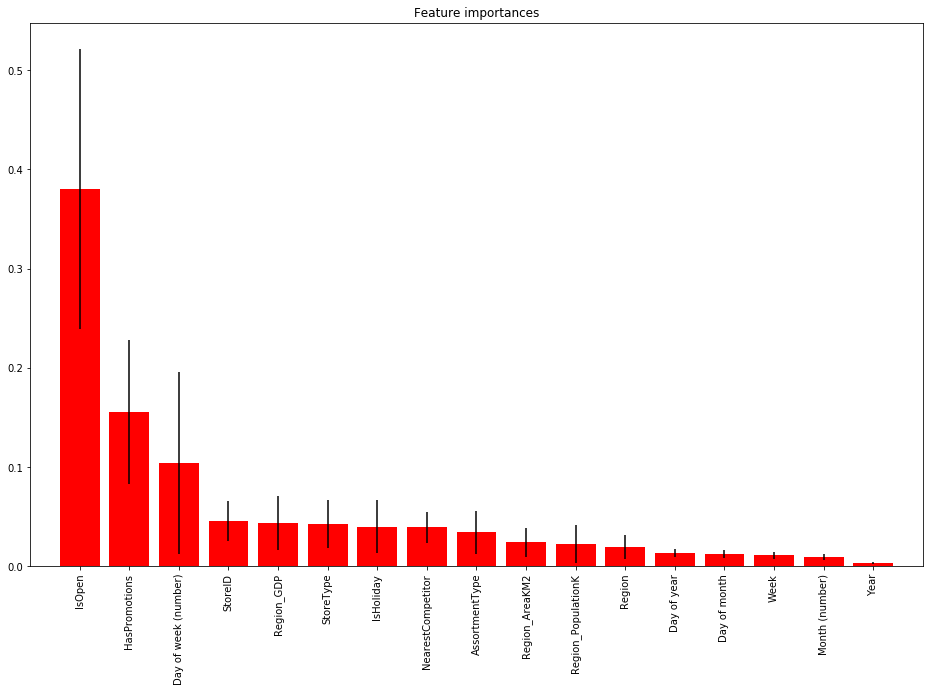

Optimal number of features : 17
Best features : Index(['AssortmentType', 'Day of month', 'Day of week (number)', 'Day of year',
       'HasPromotions', 'IsHoliday', 'IsOpen', 'Month (number)',
       'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK', 'StoreID', 'StoreType', 'Week', 'Year'],
      dtype='object')
Original features : Index(['AssortmentType', 'Day of month', 'Day of week (number)', 'Day of year',
       'HasPromotions', 'IsHoliday', 'IsOpen', 'Month (number)',
       'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK', 'StoreID', 'StoreType', 'Week', 'Year'],
      dtype='object')


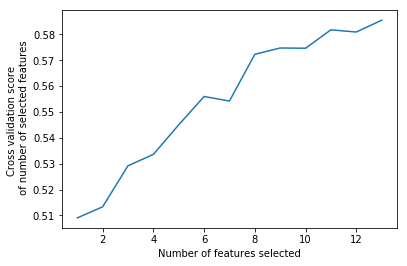

<Figure size 432x288 with 0 Axes>

In [252]:
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#forest = RandomForestRegressor(n_estimators=242, n_jobs=-1, random_state=0)
start=time.time()
forest = ExtraTreesRegressor(n_estimators=250, 
                             n_jobs=-1, 
                             max_depth = 15, 
                             max_features = 2,
                             random_state=0)

forest.fit(trainDataset_X, trainDataset_y)
M_FitTime = time.time() - start
print(" ")
print(" ")
print("Measured Fit Time: ", M_FitTime)

UseTScv=True
if UseTScv:
    from sklearn.model_selection import TimeSeriesSplit
    #start=time.time()
    tscv = TimeSeriesSplit(n_splits=5)
    #scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=tscv, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )        
else:
    from sklearn.model_selection import KFold
    #start=time.time()
    kfolds = KFold(n_splits=5,shuffle=False,random_state=0)
    #scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=kfolds, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )

print(" ")
print(" ")

Params=forest.get_params(deep=True)
#print(" ")
#print(" ")
print("Model Parameters: ")
print(Params)
print(" ")
print(" ")

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
d=[]
for f in range(trainDataset_X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], trainDataset_X.columns[indices[f]], importances[indices[f]]))
    d.append({'Feature': trainDataset_X.columns[indices[f]]})

from sklearn.feature_selection import RFECV
selector = RFECV(forest, step=1, cv=tscv, min_features_to_select=5,n_jobs=-1,verbose=0)
selector = selector.fit(trainDataset_X, trainDataset_y)
print(selector.support_)
print(selector.ranking_)
print("Optimal number of features : %d" % selector.n_features_)
print("Cross Validation scores:")
print(selector.grid_scores_)

trainDataset_XS=pd.DataFrame(trainDataset_X[trainDataset_X.columns[selector.support_]])
#print(trainDataset_XS.head(3))

FI=[]
importancesS = selector.estimator_.feature_importances_
indicesS = np.argsort(importancesS)[::-1]
for f in range(trainDataset_XS.shape[1]):
    #print("%d. feature %d %s (%f)" % (f + 1, indicesS[f], trainDataset_XS.columns[indicesS[f]], importancesS[indicesS[f]]))
    FI.append({'Rank':f+1, 'Feature':trainDataset_XS.columns[indicesS[f]], 'Importance':importancesS[indicesS[f]]})
	
Feat_Imp = pd.DataFrame(FI)
print(Feat_Imp)
#print(flow_variables)
print(trainDataset_X.shape)
print(trainDataset_XS.shape)

# Plot the feature importances of the forest
plt.figure(figsize=(16,10))
plt.title("Feature importances")
plt.bar(range(trainDataset_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(trainDataset_X.shape[1]), trainDataset_X.columns[indices],rotation=90)
plt.xlim([-1, trainDataset_X.shape[1]])
plt.show()


print('Optimal number of features :', selector.n_features_)
print('Best features :', trainDataset_X.columns[selector.support_])
print('Original features :', trainDataset_X.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()
plt.savefig('C:\\Benchmarking\\FeatureImportance.png')
output_table = trainDataset_XS.join(trainDataset_y, lsuffix='_X', rsuffix='_y')

# Dataset Size Study w/ ExtraTreesRegressor with Cross_Validade:

In [89]:
SampleSizes = [20, 30, 40, 50, 60, 70, 80, 90] 
for i in SampleSizes:
    CrossEval(i)

Training data set shape: (20110, 17)
Measured Fit Time:  0.8934476375579834
Using Time Series Cross Validation
 
 
Cross Validation Performance: 
Cross Validation Time: 23.826221
[0.68329983 0.55466659 0.65183528 0.66779217 0.39102993]
EV: 0.589725
[ 976.44519848 1292.50419848 1133.46605205 1044.31633422 1269.88681822]
MAE: 1143.323720
[2070151.61218798 3975607.97450234 2425820.47504332 2393693.14476846
 6059182.7266187 ]
MSE: 3384891.186624
[1438.80214491 1993.89266875 1557.50456662 1547.15647068 2461.54072211]
RMSE: 1839.807378
XV R2 Actuals: [0.66277831 0.55438427 0.65164117 0.66778777 0.39081453]
Cross Validation R2: 0.585481
XVR_fit_time Actuals:  [1.18125725 1.64521885 2.16161036 2.51963973 3.08020592]
XVR_fit_time: 2.117586
score_time Actuals:  [0.87560153 0.87660193 0.85982919 0.8892014  0.87360144]
score_time: 0.874967
 
 
Prediction Time:  0.2184004783630371
 
Validation data set shape: (20405, 17)
Validation Set Explained Variance (EV): 0.67
MAE: 1021.464769
MSE: 1963549.971

Training data set shape: (70387, 17)
Measured Fit Time:  1.912212610244751
Using Time Series Cross Validation
 
 
Cross Validation Performance: 
Cross Validation Time: 23.698446
[0.68329983 0.55466659 0.65183528 0.66779217 0.39102993]
EV: 0.589725
[ 976.44519848 1292.50419848 1133.46605205 1044.31633422 1269.88681822]
MAE: 1143.323720
[2070151.61218798 3975607.97450234 2425820.47504332 2393693.14476846
 6059182.7266187 ]
MSE: 3384891.186624
[1438.80214491 1993.89266875 1557.50456662 1547.15647068 2461.54072211]
RMSE: 1839.807378
XV R2 Actuals: [0.66277831 0.55438427 0.65164117 0.66778777 0.39081453]
Cross Validation R2: 0.585481
XVR_fit_time Actuals:  [1.16980362 1.57860303 2.10600376 2.49700451 3.02880645]
XVR_fit_time: 2.076044
score_time Actuals:  [0.87360168 0.8892014  0.8766017  0.89420176 0.87360168]
score_time: 0.881442
 
 
Prediction Time:  0.2184004783630371
 
Validation data set shape: (20405, 17)
Validation Set Explained Variance (EV): 0.62
MAE: 1132.892700
MSE: 2329374.4672

# Tests:

In [193]:
LearningRate = [0.14, 0.15, 0.16, 0.13, 0.13]
EvalMetric = ['RMSE','R2']
max_depth= [4,5,7,8]
print(type(LearningRate))
print(len(LearningRate))
print(LearningRate[int((len(LearningRate)/2)-0.5)])
print(LearningRate[0])
print(LearningRate[len(LearningRate)-1])

<class 'list'>
5
0.16
0.14
0.13


In [225]:
from hyperopt import hp

# Create the domain space
#LearningRate = hp.uniform('LearningRate', 0.14, 0.16)
#EvalMetric = hp.choice('EvalMetric',['RMSE','R2','MAE'])
#max_depth=hp.choice('max_depth', [4,5])
#print(type(EvalMetric))
space={'LR': hp.uniform('LearningRate', 0.14, 0.16),
       'EvalMetric': hp.choice('EvalMetric',['RMSE','R2','MAE']),
       'Max_depth': hp.choice('max_depth', [4,5])
      }
from hyperopt.pyll.stochastic import sample
samples=[]
print(type(samples))
for _ in range(5):
    samples.append(sample(space))
print(samples[0])
print(samples[0]['EvalMetric'])

<class 'list'>
{'EvalMetric': 'R2', 'LR': 0.1433033736034484, 'Max_depth': 4}
R2


In [34]:
a={}
?a
a['RMSE']=4
a

{'RMSE': 4}

## Calculate Feature importances and Graph:

Categorical Columns:
Index(['StoreType', 'AssortmentType'], dtype='object')
 
 
Head of Training Data:
   StoreID  IsHoliday  IsOpen  HasPromotions  StoreType  AssortmentType  \
0     1000          0       1              0          0               0   
1     1000          0       1              0          0               0   
2     1000          0       1              0          0               0   

   NearestCompetitor  Region  NumberOfSales  Region_AreaKM2  Region_GDP  \
0                326       7           5676            9643       17130   
1                326       7           8111            9643       17130   
2                326       7           8300            9643       17130   

   Region_PopulationK  Year  Month (number)  Week  Day of year  Day of month  \
0                2770  2016               3    10           61             1   
1                2770  2016               3    10           62             2   
2                2770  2016               3    10      

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
 
Measured Fit Time:  1.0066440105438232
Using Time Series Cross Validation
 
 
Cross Validation Performance: 
Cross Validation Time: 8.94
[0.65366408 0.50842293 0.47459996 0.61972558 0.39699894]
EV: 0.53
[1049.49583483 1371.75359231 1321.84140112 1028.53560687 1305.02858933]
MAE: 1215.33
[2457903.34035326 4386336.06559434 3677100.90866691 2740695.37281478
 5999530.01001014]
MSE: 3852313.14
[1567.77018097 2094.35815122 1917.57683253 1655.50456744 2449.3938046 ]
RMSE: 1962.73
XV R2 Actuals: [0.59961468 0.50834681 0.47195162 0.61962855 0.39681197]
Cross Validation R2: 0.52
XVR_fit_time Actuals:  [1.7638638  0.40660071 0.53040123 0.73700309 0.96720171]
XVR_fit_time: 0.88
score_time Actuals:  [0.45340085 0.43680072 0.45240045 0.45240092 0.43780088]
score_time: 0.45
 
 
Converting Validation Categorical Columns to Numbers:
 
 
Head of Validation Data:
   StoreID  IsHoliday  IsOpen  HasPromotions  StoreType  AssortmentType  \
0     1145          0       1              0          0         

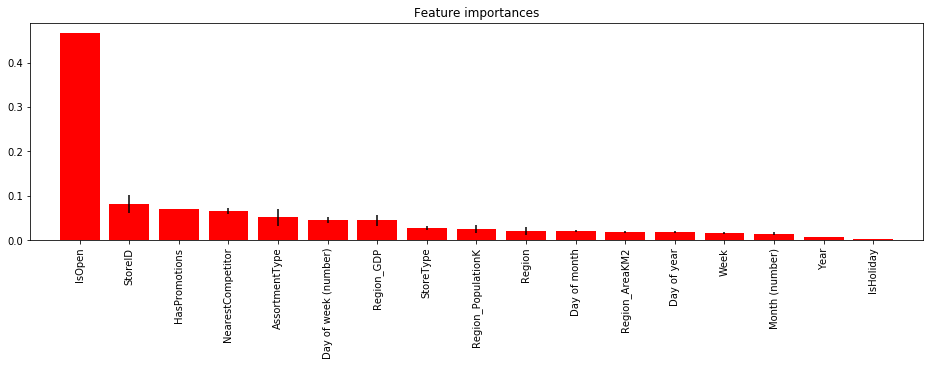

 
Model Parameters:
Win
7
3.6.7
sklearn
0.20.2
['Win', '7', 'Python', '3.6.7', 'sklearn', '0.20.2', 'ExtraTreesRegressor', 1.0066440105438232, 0.8810141086578369, 0.44656076431274416, 8.939087629318237, 0.5306822996170675, 1215.3310048931853, 3852313.1394878863, 1962.731041046604, 0.5192707252591598, 0.10920000076293945, 0.6028330361805241, 1109.069321244793, 2394670.5888502817, 1547.4723224827906, 0.6003824226912086, {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}, [{'1. feat: 6 IsOpen (0.466111)'}, {'2. feat: 13 StoreID (0.081406)'}, {'3. feat: 4 HasPromotions (0.070828)'}, {'4. feat: 8 NearestCompetitor (0.066025)'}, {'5. feat: 0 AssortmentType (0.051350)'}, {'6. feat: 2 Day of week

In [8]:
#Calculate Feature importances and Graph:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print(" ")
print(" ")
print("Feature Importances:")
global d
d=[]
for f in range(trainDataset_X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], trainDataset_X.columns[indices[f]], importances[indices[f]]))
    d.append({"%d. feat: %d %s (%f)" % (f + 1, indices[f], trainDataset_X.columns[indices[f]], importances[indices[f]])})

Feat_Imp = pd.DataFrame(d)

# Plot the feature importances of the forest

plt.figure(figsize=(16,4))
plt.title("Feature importances")
plt.bar(range(trainDataset_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(trainDataset_X.shape[1]), trainDataset_X.columns[indices],rotation=90)
plt.xlim([-1, trainDataset_X.shape[1]])
plt.show()

print(" ")
print("Model Parameters:")
Params


#InsertHeader()
InsertValues()
print('***Process Completed***')

## Load Train Set:

In [2]:
#Load Train Set:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
import csv
import sys
import gc
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
trainBench = pd.read_csv("c:/Benchmarking/trainBench.csv")
#testBench = pd.read_csv("c:/Benchmarking/testBench.csv")

trainBench = trainBench.drop("ID", axis=1)

cat_columns = trainBench.select_dtypes(['object']).columns
print("Categorical Columns:")
print(cat_columns)
trainBench[cat_columns] = trainBench[cat_columns].astype('category')
cat_columns = trainBench.select_dtypes(['category']).columns
trainBench[cat_columns] = trainBench[cat_columns].apply(lambda x: x.cat.codes)
Int64columns = trainBench.select_dtypes(['int64']).columns
#Int64columns
trainBench[Int64columns] = trainBench[Int64columns].astype(np.int32)
#trainBench.info()
mask = trainBench.columns.difference(['NumberOfSales'])
trainDataset_X = trainBench[mask]
print("Feature Columns:")
print(mask)
trainDataset_y = trainBench['NumberOfSales']
del trainBench
gc

Categorical Columns:
Index(['StoreType', 'AssortmentType'], dtype='object')
Feature Columns:
Index(['AssortmentType', 'Day of month', 'Day of week (number)', 'Day of year',
       'HasPromotions', 'IsHoliday', 'IsOpen', 'Month (number)',
       'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP',
       'Region_PopulationK', 'StoreID', 'StoreType', 'Week', 'Year'],
      dtype='object')


## Load Validation Set:

In [ ]:
#Load Validation Set:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

validBench = pd.read_csv("c:/Benchmarking/validBench.csv")
validBench = validBench.drop("ID", axis=1)
#Int64columns = validBench.select_dtypes(['int64']).columns
#Int64columns
validBench[Int64columns] = validBench[Int64columns].astype(np.int32)

print(" ")
print(" ")
print("Converting Validation Categorical Columns to Numbers:")
cat_columns
validBench[cat_columns] = validBench[cat_columns].astype('category')
cat_columns = validBench.select_dtypes(['category']).columns
validBench[cat_columns] = validBench[cat_columns].apply(lambda x: x.cat.codes)
print(" ")
print(" ")
print("Head of Validation Data:")
print(validBench.head(3))
print(" ")
print(mask)
validBench_X = validBench[mask]
validBench_y = validBench['NumberOfSales']

In [38]:
#Testing Time series cross validation:
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)
#scores = cross_validate(forest, trainDataset_X, trainDataset_y, cv=kfolds, scoring=('r2','explained_variance','neg_mean_absolute_error','neg_mean_squared_error') )

X = trainDataset_X
y = trainDataset_y
 
for train_index, test_index in tscv.split(y):
   print("TRAIN:", train_index, "TEST:", test_index)

   

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [    0     1     2 ... 16760 16761 16762] TEST: [16763 16764 16765 ... 33518 33519 33520]
TRAIN: [    0     1     2 ... 33518 33519 33520] TEST: [33521 33522 33523 ... 50276 50277 50278]
TRAIN: [    0     1     2 ... 50276 50277 50278] TEST: [50279 50280 50281 ... 67034 67035 67036]
TRAIN: [    0     1     2 ... 67034 67035 67036] TEST: [67037 67038 67039 ... 83792 83793 83794]
TRAIN: [    0     1     2 ... 83792 83793 83794] TEST: [ 83795  83796  83797 ... 100550 100551 100552]
